In [1]:
# Import modules
import requests
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from citipy import citipy

In [2]:
# Import API key
from api_keys import api_key

temp_units = "imperial"

In [3]:
# Output cities CSV
cities_output = "outputs/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90,90)
lng_range = (-180,180)

In [4]:
# Define URL
query_url = f"http://api.openweathermap.org/data/2.5/weather?appid={api_key}&units={temp_units}&q="

# Define count of pass throughs
count_one = 0
set_one = 1

In [5]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

616

In [6]:
cities

['chihuahua',
 'havre-saint-pierre',
 'nabire',
 'dingle',
 'gat',
 'bokovskaya',
 'ostrovnoy',
 'palabuhanratu',
 'sentyabrskiy',
 'mataura',
 'victoria',
 'cape town',
 'ushuaia',
 'hilo',
 'port alfred',
 'road town',
 'kainantu',
 'nantucket',
 'lata',
 'woodstock',
 'westlock',
 'busselton',
 'east london',
 'souillac',
 'cherskiy',
 'norman wells',
 'lebu',
 'charagua',
 'itaituba',
 'ponta do sol',
 'bredasdorp',
 'verkh-usugli',
 'great bend',
 'catamarca',
 'mar del plata',
 'yabrud',
 'sioux lookout',
 'hermanus',
 'mayor pablo lagerenza',
 'castro',
 'tezu',
 'ginir',
 'varna',
 'hasaki',
 'punta arenas',
 'nyzy',
 'barentsburg',
 'barrow',
 'cockburn town',
 'lompoc',
 'ilulissat',
 'taolanaro',
 'te anau',
 'rikitea',
 'pangnirtung',
 'davlekanovo',
 'cayenne',
 'port elizabeth',
 'vila franca do campo',
 'nizhneyansk',
 'doctor pedro p. pena',
 'aklavik',
 'new norfolk',
 'torbay',
 'kaitangata',
 'albany',
 'luena',
 'provideniya',
 'morondava',
 'edd',
 'nikolskoye',
 '

In [12]:
# API call
# 1. Perform weather check on each city using series of API calls
# 2. Include print log of each city 

# Create empty lists for dataframe
city_two = []
cloudinesses = []
dates = []
humidities = []
lats = []
lngs = []
max_temps = []
wind_speeds = []
countries = []

In [13]:
# Set initial count quantities for organization
for city in cities:
    try:
        response = requests.get(query_url + city.replace(" ", "&")).json()
        cloudinesses.append(response['clouds']['all'])
        countries.append(response['sys']['country'])
        dates.append(response['dt'])
        humidities.append(response['main']['humidity'])
        lats.append(response['coord']['lat'])
        lngs.append(response['coord']['lon'])
        max_temps.append(response['main']['temp_max'])
        wind_speeds.append(response['wind']['speed'])
        if count_one > 48:
            count_one = 1
            set_one += 1
            city_two.append(city)
        else:
            count_one += 1
            city_two.append(city)
        print(f"Processing Record {count_one} of Set {set_one} | {city}")
    except Exception:
        print("City not found")

print("Data Retrieval Complete!")

Processing Record 40 of Set 11 | chihuahua
Processing Record 41 of Set 11 | havre-saint-pierre
Processing Record 42 of Set 11 | nabire
Processing Record 43 of Set 11 | dingle
Processing Record 44 of Set 11 | gat
Processing Record 45 of Set 11 | bokovskaya
Processing Record 46 of Set 11 | ostrovnoy
City not found
City not found
Processing Record 47 of Set 11 | mataura
Processing Record 48 of Set 11 | victoria
Processing Record 49 of Set 11 | cape town
Processing Record 1 of Set 12 | ushuaia
Processing Record 2 of Set 12 | hilo
Processing Record 3 of Set 12 | port alfred
City not found
Processing Record 4 of Set 12 | kainantu
Processing Record 5 of Set 12 | nantucket
Processing Record 6 of Set 12 | lata
Processing Record 7 of Set 12 | woodstock
Processing Record 8 of Set 12 | westlock
Processing Record 9 of Set 12 | busselton
Processing Record 10 of Set 12 | east london
Processing Record 11 of Set 12 | souillac
Processing Record 12 of Set 12 | cherskiy
Processing Record 13 of Set 12 | no

Processing Record 29 of Set 15 | vila
Processing Record 30 of Set 15 | kita
Processing Record 31 of Set 15 | kavieng
City not found
Processing Record 32 of Set 15 | ust-kut
Processing Record 33 of Set 15 | luau
City not found
City not found
Processing Record 34 of Set 15 | iqaluit
Processing Record 35 of Set 15 | klaksvik
Processing Record 36 of Set 15 | sitka
City not found
Processing Record 37 of Set 15 | andujar
Processing Record 38 of Set 15 | mehamn
Processing Record 39 of Set 15 | guiberoua
Processing Record 40 of Set 15 | airai
Processing Record 41 of Set 15 | batagay
Processing Record 42 of Set 15 | quime
City not found
Processing Record 43 of Set 15 | touros
Processing Record 44 of Set 15 | pisco
City not found
Processing Record 45 of Set 15 | shurugwi
Processing Record 46 of Set 15 | wahiawa
City not found
Processing Record 47 of Set 15 | magadi
Processing Record 48 of Set 15 | bethel
Processing Record 49 of Set 15 | remanso
City not found
Processing Record 1 of Set 16 | darg

Processing Record 26 of Set 19 | yarmouth
City not found
Processing Record 27 of Set 19 | antsirabe
Processing Record 28 of Set 19 | vardo
Processing Record 29 of Set 19 | hua hin
Processing Record 30 of Set 19 | mount gambier
City not found
Processing Record 31 of Set 19 | arman
Processing Record 32 of Set 19 | livingstonia
Processing Record 33 of Set 19 | karpathos
Processing Record 34 of Set 19 | ust-kuyga
Processing Record 35 of Set 19 | ketou
Processing Record 36 of Set 19 | straumen
Processing Record 37 of Set 19 | werther
Processing Record 38 of Set 19 | greenwood
Processing Record 39 of Set 19 | ulladulla
Processing Record 40 of Set 19 | sao gabriel da cachoeira
Processing Record 41 of Set 19 | mattru
Processing Record 42 of Set 19 | deputatskiy
Processing Record 43 of Set 19 | carutapera
Processing Record 44 of Set 19 | port-gentil
Processing Record 45 of Set 19 | voh
Processing Record 46 of Set 19 | bata
Processing Record 47 of Set 19 | nicoya
Processing Record 48 of Set 19 |

In [15]:
# Create dictionary
weather_dict = {
    "City": city_two,
    "Cloudiness": cloudinesses,
    "Country": countries,
    "Date": dates,
    "Humidity": humidities,
    "Lat": lats,
    "Lng": lngs,
    "Max Temp": max_temps,
    "Wind Speed": wind_speeds
}

In [17]:
# Create dataframe
weather_df = pd.DataFrame(weather_dict)
weather_df.head(3)

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,chihuahua,5,MX,1576265910,25,28.66,-106.08,72.00,8.05
1,havre-saint-pierre,90,CA,1576265910,54,50.23,-63.60,3.20,8.05
2,nabire,100,ID,1576265910,93,-3.36,135.50,71.38,1.92


In [18]:
# Export to CSV
weather_df.to_csv(r"outputs/weather_df.csv")

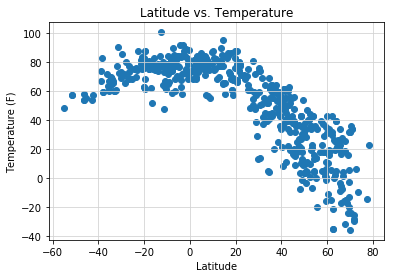

In [21]:
# Latitude vs. Temperature Plot
plt.scatter(weather_df['Lat'], weather_df['Max Temp'])
plt.title('Latitude vs. Temperature')
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.grid(b=True, which="major", axis="both", linestyle="-", color="lightgrey")
plt.savefig(r"outputs/latitude_vs_max_temp.png")

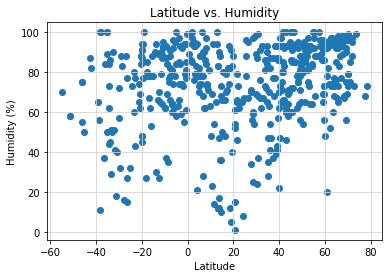

In [22]:
# Latitude vs. Humidity Plot
plt.scatter(weather_df['Lat'], weather_df['Humidity'])
plt.title('Latitude vs. Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid(b=True, which="major", axis="both", linestyle="-", color="lightgrey")
plt.savefig(r"outputs/latitude_vs_humidity.png")

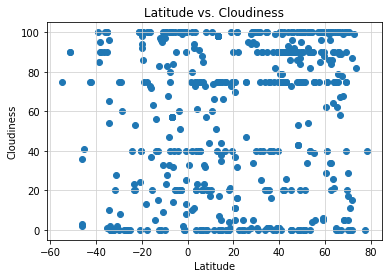

In [23]:
# Latitude vs. Humidity Plot
plt.scatter(weather_df['Lat'], weather_df['Cloudiness'])
plt.title('Latitude vs. Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.grid(b=True, which="major", axis="both", linestyle="-", color="lightgrey")
plt.savefig(r"outputs/latitude_vs_cloudiness.png")

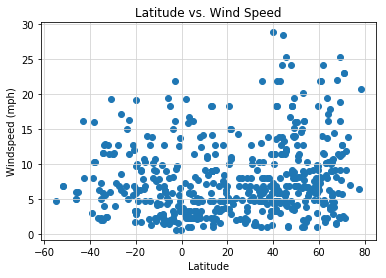

In [24]:
# Latitude vs. Wind Speed Plot
plt.scatter(weather_df['Lat'], weather_df['Wind Speed'])
plt.title('Latitude vs. Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Windspeed (mph)')
plt.grid(b=True, which="major", axis="both", linestyle="-", color="lightgrey")
plt.savefig(r"outputs/latitude_vs_wind_speed.png")